In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nbody import Particles, NBodySimulator, OctTreeNode
from nbody import load_files, save_movie
from numba import jit, njit, prange,set_num_threads, config
import os

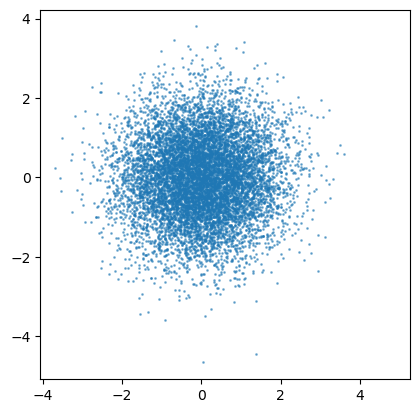

In [6]:
# Set the number of threads to use for numba
nthreads = 8
set_num_threads(nthreads)
# initial conditions
np.random.seed(0) #fix random
N = 10000
pts = Particles(N)
np.random.seed(0)
pts.r = np.random.randn(N,3)
np.random.seed(1)
pts.v = np.random.randn(N,3)
np.random.seed(2)
pts.a = np.random.randn(N,3) # not important, actually
pts.m = np.ones((N, 1))* 20/N
dt = 0.01
freq = int(2/dt)
plt.scatter(pts.r[:,0], pts.r[:,1],s=1, alpha=0.5)
plt.axis("square")

simulation = NBodySimulator(particles=pts)
simulation.setup(G=1,
                 rsoft=0.01,
                 method='RK2', 
                 io_freq=freq,
                 io_screen=True,
                 visualization=True, 
                 io_header="RK2")

Time:  0.0 dt:  0.01
EK, EU, E = 29.922655,-113.605596,-83.682941


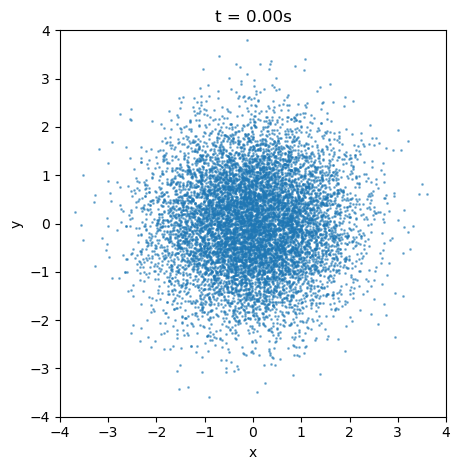

Time:  2.0000000000000013 dt:  0.01
EK, EU, E = 80.056427,-163.775106,-83.718679


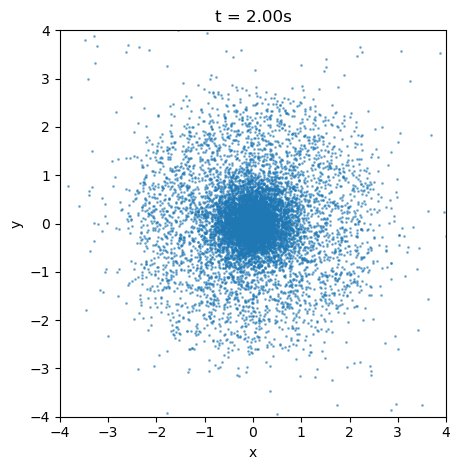

Time:  3.9999999999999587 dt:  0.01
EK, EU, E = 80.211034,-163.907063,-83.696029


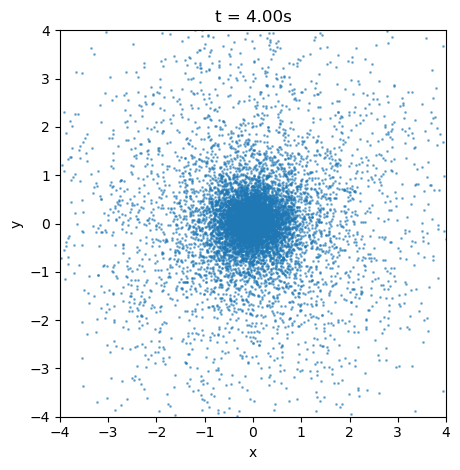

Time:  5.9999999999999165 dt:  0.01
EK, EU, E = 87.221711,-170.874691,-83.652980


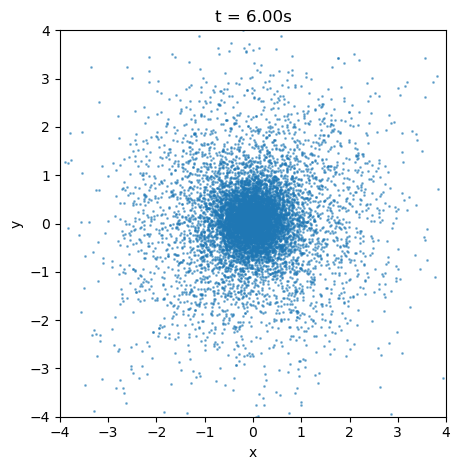

Time:  7.999999999999874 dt:  0.01
EK, EU, E = 84.756699,-168.431964,-83.675265


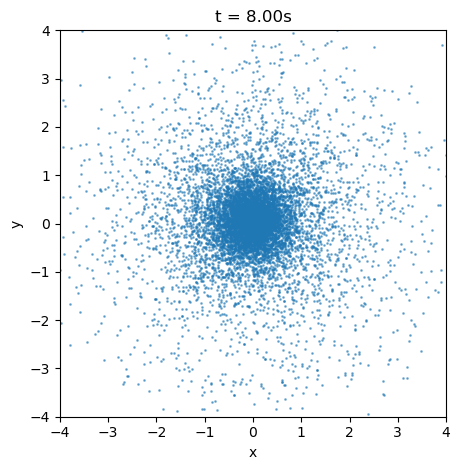

Time:  9.999999999999831 dt:  1.687538997430238e-13
EK, EU, E = 82.920129,-166.636941,-83.716812


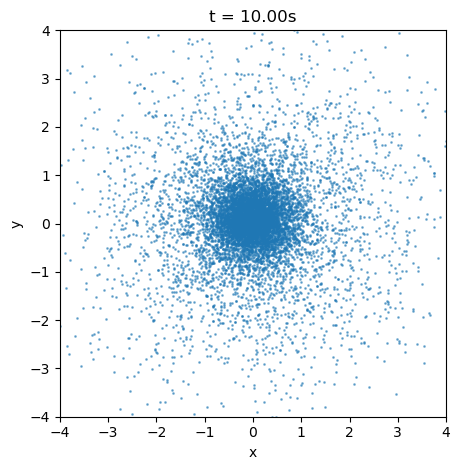

In [7]:
simulation.evolve(dt, 10)

In [ ]:
import glob
def load(header):
    pattern="[0-9][0-9][0-9][0-9][0-9][0-9]"
    fns = "data_" + header + "/" + header + "_" + pattern + ".txt"
    fns = glob.glob(fns)
    K=[]
    U=[]
    E=[]
    for fn in fns:
        ek, eu, e = np.loadtxt(fn, delimiter=",", usecols=(-3, -2, -1), max_rows=1)
        K.append(ek)
        U.append(eu)
        E.append(e)
    
    return K, U, E

In [ ]:
K_euler, U_euler, E_euler = load("euler")
K_RK2, U_RK2, E_RK2 = load("RK2")
K_RK4, U_RK4, E_RK4 = load("RK4")
K_leap, U_leap, E_leap = load("leap")
t = np.arange(0,11,2)

plt.figure(1)
plt.plot(t,K_euler, label="euler")
plt.plot(t,K_RK2, label="RK2")
plt.plot(t,K_RK4, label="RK4")
plt.plot(t,K_leap, label="Leap-frog")
plt.xlabel("t(s)", fontsize=18)
plt.ylabel("kinetic energy", fontsize=18)
plt.legend()

plt.figure(2)
plt.plot(t,U_euler, label="euler")
plt.plot(t,U_RK2, label="RK2")
plt.plot(t,U_RK4, label="RK4")
plt.plot(t,U_leap, label="Leap-frog")
plt.xlabel("t(s)", fontsize=18)
plt.ylabel("potential energy", fontsize=18)
plt.legend()

plt.figure(3)
plt.plot(t,E_euler, label="euler")
plt.plot(t,E_RK2, label="RK2")
plt.plot(t,E_RK4, label="RK4")
plt.plot(t,E_leap, label="Leap-frog")
plt.xlabel("t(s)", fontsize=18)
plt.ylabel("total energy", fontsize=18)
plt.legend()